In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mymoviedb.csv", engine="python", on_bad_lines="skip", encoding="utf-8")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [73]:
with open("mymoviedb.csv", "r", encoding="utf-8", errors="ignore") as f:
    total_lines = sum(1 for line in f)

print("CSV total lines:", total_lines)
print("DataFrame rows:", len(df))
print("Skipped rows approx:", total_lines - len(df) - 1)  # -1 header line के लिए


CSV total lines: 9848
DataFrame rows: 9837
Skipped rows approx: 10


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [75]:
df['Release_Date'].head()

0    2021-12-15
1    2022-03-01
2    2022-02-25
3    2021-11-24
4    2021-12-22
Name: Release_Date, dtype: object

In [76]:

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Date'].dtype

dtype('<M8[ns]')

In [77]:
df.duplicated().sum()

8

In [78]:
df = df.drop_duplicates()

In [79]:
df.reset_index(drop=True, inplace=True)


In [80]:
df.duplicated().sum()

0

In [81]:
df.describe()

,Release_Date,Popularity
count,9827,9827.000000
mean,2006-09-23 11:05:51.317797888,40.320570
min,1902-04-17 00:00:00,7.100000
25%,2000-10-18 00:00:00,16.127500
50%,2011-09-13 00:00:00,21.191000
75%,2017-11-22 00:00:00,35.174500
max,2024-07-03 00:00:00,5083.954000
std,NaN,108.874308


In [82]:
cols = ['Overview','Original_Language','Poster_Url']
df.drop(cols, axis = 1, inplace =True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [83]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')


In [84]:
def catigorize_col(df,col,labels):
    
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col],edges,labels = labels,duplicates = 'drop')
    return df
       

In [85]:
labels = ['not_popular','below_avg','average','popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [86]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [87]:
df.dropna(inplace = True)

In [88]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [89]:
df['Genre'] =df['Genre'].str.split(',')

df = df.explode('Genre').reset_index(drop = True)

In [90]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery
...,...,...,...,...,...,...
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984-09-23,Threads,13.354,186,popular,War
25549,1984-09-23,Threads,13.354,186,popular,Drama


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25551 non-null  datetime64[ns]
 1   Title         25551 non-null  object        
 2   Popularity    25551 non-null  float64       
 3   Vote_Count    25551 non-null  object        
 4   Vote_Average  25551 non-null  category      
 5   Genre         25551 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), object(3)
memory usage: 1023.4+ KB


# Data Visualization

# what is the most frequent genre of movies released on Netflix?

In [101]:
df['Genre'].describe()

count         25551
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

In [95]:
import seaborn as sns

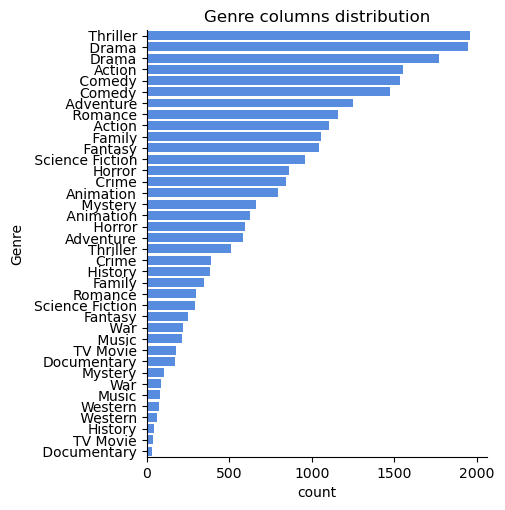

In [117]:
sns.catplot(y = 'Genre',data = df,order = df['Genre'].value_counts().index,kind ='count', color = '#4287f5')
plt.title('Genre columns distribution')
plt.show()

# which has highest votes in vote avg column

In [119]:
df['Vote_Average'].value_counts()

Vote_Average
average        6612
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

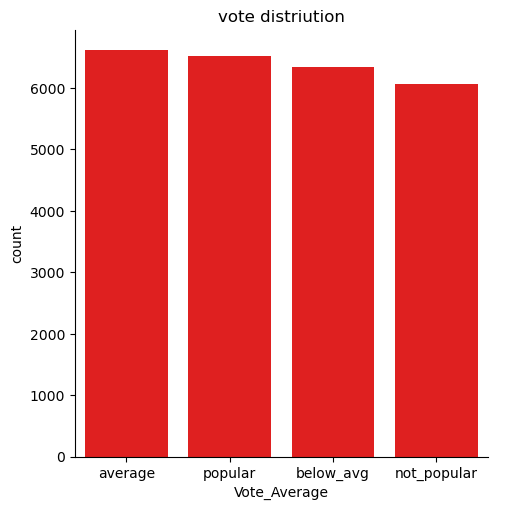

In [125]:
sns.catplot(x = 'Vote_Average',data = df,kind = 'count',order = df['Vote_Average'].value_counts().index,color = 'r')
plt.title('vote distriution')
plt.show()

# what movie got the highest popularity?what's is Genre

In [131]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# what movie got the lowest popularity?what's is Genre

In [135]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984-09-23,Threads,13.354,186,popular,War
25549,1984-09-23,Threads,13.354,186,popular,Drama
25550,1984-09-23,Threads,13.354,186,popular,Science Fiction


# which year has the most filmmed movies

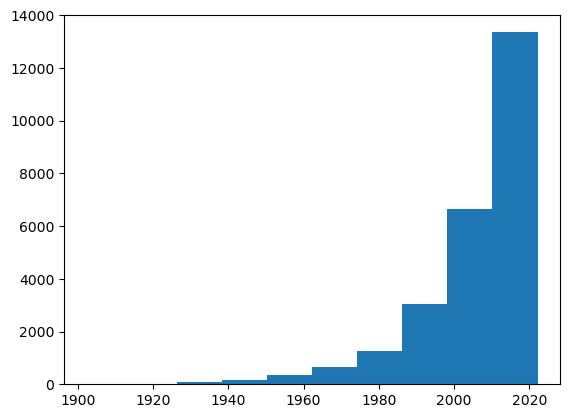

In [138]:
plt.hist(x = 'Release_Date',data = df)
plt.show()

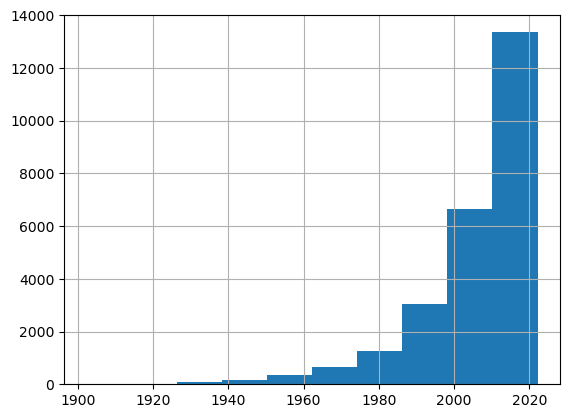

In [139]:
df['Release_Date'].hist()
plt.show()

In [ ]:
Conclusion
Q.1:what is the most frequent genre of movies released on Netflix?
Ans: Thriller is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genre

Q.2:which has highest votes in vote avg column
Ans: we have 25.5% of our dataset with popular votes (6612) drama again gets the highest popularity among fans by being having more than 18.5% of movies poularityes.

Q.3:what movie got the highest popularity?what's is Genre?
Ans:spider man: no way home has the highest popularity rate in our dataset and it has genre of Action,Adventure ,Science Fiction

Q.4:what movie got the lowest popularity?what's is Genre
Ans: The he United States ,thread	has the highest lowest rate in our dataset and it has genre of music,drama, war,sci-fi

Q.5:which year has the most filmmed movies
Ans:2020 has the highest filmming rate in our  dataset